In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/IBM/data_sensor.csv')
data.head()

,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM,ID
0,467.90,65.59,486.10,41.06,23.27,92.39,1
1,387.14,70.23,501.81,25.93,18.77,85.17,2
2,339.75,74.72,535.88,30.50,19.41,80.76,3
3,390.19,63.83,422.76,24.18,17.41,63.55,4
4,454.11,70.64,619.85,16.50,20.31,83.19,5


In [ ]:
data=data.drop(columns="ID")
data.head()

,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
0,467.90,65.59,486.10,41.06,23.27,92.39
1,387.14,70.23,501.81,25.93,18.77,85.17
2,339.75,74.72,535.88,30.50,19.41,80.76
3,390.19,63.83,422.76,24.18,17.41,63.55
4,454.11,70.64,619.85,16.50,20.31,83.19


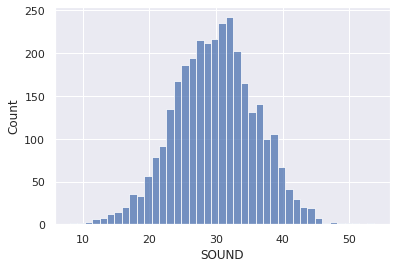

In [ ]:
#Data normally distributed
sns.histplot(data=data,x="SOUND")

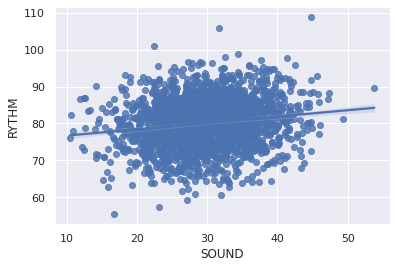

In [ ]:
sns.regplot(data=data.sample(2000),x="SOUND", y="RYTHM")

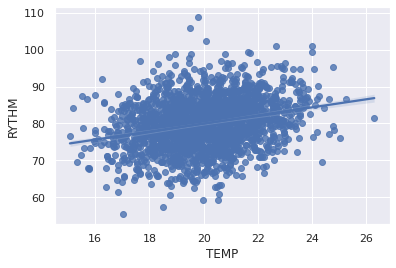

In [ ]:
sns.regplot(data=data.sample(2000),x="TEMP", y="RYTHM")

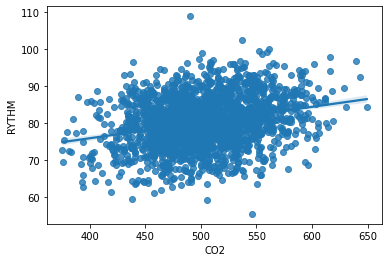

In [ ]:
sns.regplot(data=data.sample(2000),x="CO2", y="RYTHM")

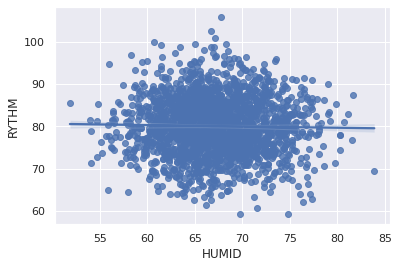

In [ ]:
sns.regplot(data=data.sample(2000),x="HUMID", y="RYTHM")

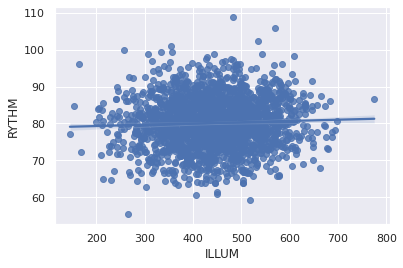

In [ ]:
sns.regplot(data=data.sample(2000),x="ILLUM", y="RYTHM")

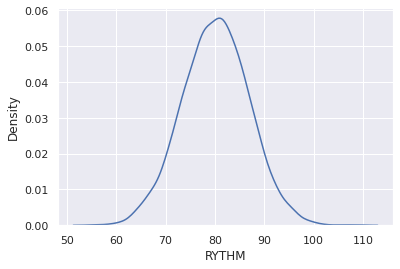

In [ ]:
sns.kdeplot(data=data,x="RYTHM")

In [ ]:
data.describe()

,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
count,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000
mean,439.163412,67.086106,501.620666,29.840194,20.042578,80.156616
std,89.915142,4.776214,42.951183,6.158710,1.648479,6.755854
min,145.480000,51.860000,352.820000,8.060000,14.760000,55.370000
25%,377.060000,63.770000,471.427500,25.550000,18.920000,75.657500
50%,437.375000,66.935000,502.350000,29.885000,20.050000,80.220000
75%,500.792500,70.330000,530.142500,33.932500,21.180000,84.660000
max,775.140000,83.900000,672.380000,53.780000,26.290000,108.900000


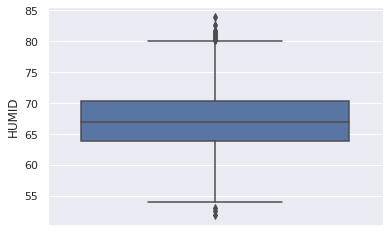

In [ ]:
sns.set_theme(style="darkgrid")
sns.boxplot(data=data,y="HUMID")

In [ ]:
# Remover Outliers...no se encontro mayor beneficio
#def outliers(df,ft):
#  Q1=df[ft].quantile(0.25)
#  Q3=df[ft].quantile(0.75)
 # IQR=Q3-Q1

#  lowerB=Q1 - 1.5 * IQR
#  upperB=Q3 + 1.5 * IQR
#
#  ls=df.index[(df[ft] < lowerB) | (df[ft] > upperB)]
#  return ls

In [ ]:
#index_list=[]
#for feature in ['ILLUM', 'HUMID', 'CO2', 'SOUND', 'TEMP']:
#  index_list.extend(outliers(data,feature))

In [ ]:
#def remove(df,ls):
#  ls = sorted(set(ls))
#  df = df.drop(ls)
#  return df

In [ ]:
#data_clean = remove(data,index_list)

In [ ]:
corr=data.corr()
corr

,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
ILLUM,1.000000,0.043146,-0.161856,0.053017,-0.110735,0.044763
HUMID,0.043146,1.000000,0.180879,-0.279335,-0.156514,-0.023406
CO2,-0.161856,0.180879,1.000000,-0.055331,-0.056144,0.275289
SOUND,0.053017,-0.279335,-0.055331,1.000000,-0.047159,0.167734
TEMP,-0.110735,-0.156514,-0.056144,-0.047159,1.000000,0.249845
RYTHM,0.044763,-0.023406,0.275289,0.167734,0.249845,1.000000


In [ ]:
#corrcl=data_clean.corr()
#corrcl

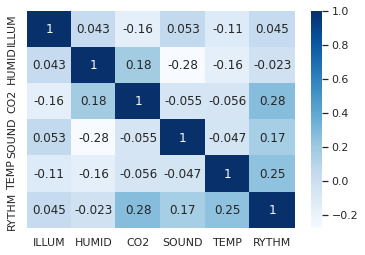

In [ ]:
sns.heatmap(corr,annot=True,cmap='Blues')

In [ ]:
data_=data.copy()
X=data_.drop(columns=["RYTHM","HUMID"])
y=data_["RYTHM"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split (X, y, test_size = 0.15, random_state=10)

In [ ]:
#Importación de Modelos a Testear
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor

In [ ]:
#Pipelines
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
#pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('svm', SVR())])))
pipelines.append(('ScaledRidge', Pipeline([('Scaler', StandardScaler()),('Ridge', Ridge())])))
pipelines.append(('ScaledBayesianRidge', Pipeline([('Scaler', StandardScaler()),('BayesianRidge', BayesianRidge())])))
pipelines.append(('ScaledSGD', Pipeline([('Scaler', StandardScaler()),('SGD', SGDRegressor())])))

In [ ]:
#X=data_.drop(columns=["RYTHM","HUMID"]) ... BayesianRidge r2=0.185944
#X=data_.drop(columns=["RYTHM"]) ... BayesianRidge r2=0.185667 
#X=data_.drop(columns=["RYTHM","HUMID"]) KFold(n_splits=2,shuffle=True,random_state=10)... BayesianRidge r2=0.192784
#test_size=15....X=data_.drop(columns=["RYTHM","HUMID"]) KFold(n_splits=2,shuffle=True,random_state=10)... ScaledRidge r2=0.0.193059
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=2,shuffle=True,random_state=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.193059 (0.002770)
ScaledLASSO: 0.101430 (0.004971)
ScaledEN: 0.121784 (0.000155)
ScaledKNN: 0.031192 (0.002164)
ScaledGBM: 0.138820 (0.006581)
ScaledSVR: 0.164899 (0.005887)
ScaledRidge: 0.193059 (0.002773)
ScaledBayesianRidge: 0.193026 (0.002811)
ScaledSGD: 0.192737 (0.002567)


In [ ]:
#Final Model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = Ridge(random_state=10)
model.fit(rescaledX,Y_train)

Ridge(random_state=10)

In [ ]:
rescaledX

array([[-0.67019155, -0.68750519, -0.27088094, -0.27933479],
       [ 0.86690275,  1.38329423,  0.66921403, -0.75500549],
       [-0.33181925, -2.42093765, -0.2627204 ,  1.28014258],
       ...,
       [-1.62139739, -0.71523079,  0.90750199, -0.84532271],
       [ 0.2100886 , -1.10734999, -0.66421929, -0.60447679],
       [-0.20811684,  0.58018379, -1.17833373,  0.96102173]])

In [ ]:
model.score(rescaledX,Y_train)

0.19553592772328154

In [ ]:
#Prueba con X_test
scaler = StandardScaler().fit(X_test)
rescaledX_test = scaler.transform(X_test)

In [ ]:
rescaledX_test

array([[-1.11040446,  0.64866216,  0.68049869,  0.41591267],
       [-0.78014724, -0.41015108, -0.03420677,  1.29848038],
       [ 2.68228768, -1.16651293, -0.70305724, -1.50795793],
       ...,
       [-0.43370419,  0.69043593,  0.14130718,  1.1587934 ],
       [ 0.87191492, -0.31540165,  0.79908919,  0.89846768],
       [ 0.88100558,  0.769316  , -2.36648676,  1.06355228]])

In [ ]:
model.score(rescaledX_test,Y_test)

0.21386439084365783

In [ ]:
#Predicción Final para Desafío
data_desafio=pd.read_csv("/content/drive/MyDrive/IBM/answers.csv")
data_desafio.head()

,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
0,0,337.90,63.29,518.13,22.38,18.59,0.0
1,1,342.96,63.19,488.85,37.36,20.41,0.0
2,2,369.86,57.39,516.86,26.45,20.89,0.0
3,3,304.65,67.80,517.50,32.98,22.52,0.0
4,4,442.25,68.21,500.91,37.28,21.88,0.0


In [ ]:
X_def=data_desafio.drop(columns=["RYTHM","HUMID","ID"])
y_def=data_desafio["RYTHM"]

In [ ]:
#Normalizacion
scaler = StandardScaler().fit(X_def)
rescaledX_def = scaler.transform(X_def)

In [ ]:
rescaledX_def

array([[-1.16829436,  0.50461494, -1.28262194, -0.8864345 ],
       [-1.10868227, -0.19011336,  1.07890116,  0.20747458],
       [-0.79177214,  0.47448158, -0.64100652,  0.49597808],
       ...,
       [ 0.27936055,  1.51087953,  0.10780755, -2.97808484],
       [ 0.73846791,  0.94949731,  0.02583211, -1.49950443],
       [ 0.19689323, -1.28203264, -0.67884133,  0.3096529 ]])

In [ ]:
#X_def

In [ ]:
#y_def

In [ ]:
predef=model.predict(rescaledX_def)
predef

array([76.86806639, 80.49477376, 80.61433849, 83.16216326, 83.83622708,
       87.13753077, 80.76056529, 81.29445073, 81.30033783, 78.16614163,
       83.99131365, 77.55210957, 78.54513767, 80.65363855, 82.07127758,
       75.8800862 , 78.16340747, 74.3587189 , 84.87055967, 80.98259897,
       80.32656668, 76.46470275, 76.79132689, 79.50147143, 84.1360591 ,
       73.8322181 , 81.05272639, 78.72759543, 81.10880162, 75.27948911,
       80.39683593, 80.94567606, 82.19998277, 80.31134257, 80.45669895,
       78.36394068, 80.74293835, 81.26820681, 73.44669695, 78.97495161,
       79.42304941, 79.79693153, 82.84408808, 78.19218602, 77.35380749,
       78.94316695, 81.68688528, 76.92043249, 85.28358599, 81.254164  ,
       80.00471529, 80.95681822, 81.71084052, 77.61688407, 82.36099828,
       79.44590355, 76.30198294, 81.85774109, 81.58088493, 79.02562212,
       82.15304354, 84.44385469, 72.2336842 , 85.72677403, 82.58920556,
       76.82221988, 81.25588682, 76.31537319, 80.02025073, 79.52

In [ ]:
data_desafio.head()

,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
0,0,337.90,63.29,518.13,22.38,18.59,0.0
1,1,342.96,63.19,488.85,37.36,20.41,0.0
2,2,369.86,57.39,516.86,26.45,20.89,0.0
3,3,304.65,67.80,517.50,32.98,22.52,0.0
4,4,442.25,68.21,500.91,37.28,21.88,0.0


In [ ]:
data_desafio["RYTHM"]=predef

In [ ]:
data_desafio.head()

,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
0,0,337.90,63.29,518.13,22.38,18.59,76.868066
1,1,342.96,63.19,488.85,37.36,20.41,80.494774
2,2,369.86,57.39,516.86,26.45,20.89,80.614338
3,3,304.65,67.80,517.50,32.98,22.52,83.162163
4,4,442.25,68.21,500.91,37.28,21.88,83.836227


In [ ]:
data_desafio.tail()

NameError: ignored

In [ ]:
respuestas=data_desafio.to_csv(sep=',', encoding='utf-8',index = False)

In [ ]:
print(respuestas)

In [ ]:
df_toround=pd.read_csv("/content/drive/MyDrive/IBM/respuestas_redondear.csv")
df_toround

,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
0,0,337.90,63.29,518.13,22.38,18.59,76.868066
1,1,342.96,63.19,488.85,37.36,20.41,80.494774
2,2,369.86,57.39,516.86,26.45,20.89,80.614338
3,3,304.65,67.80,517.50,32.98,22.52,83.162163
4,4,442.25,68.21,500.91,37.28,21.88,83.836227
...,...,...,...,...,...,...,...
795,795,421.39,55.97,451.86,29.25,18.96,76.108597
796,796,572.90,59.42,502.12,36.12,19.70,82.482746
797,797,460.78,64.28,560.54,31.20,15.11,78.018316
798,798,499.75,67.20,536.88,30.68,17.57,79.961918


In [ ]:
df_toround["RYTHM"]=df_toround["RYTHM"].round(2)
df_toround

,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
0,0,337.90,63.29,518.13,22.38,18.59,76.87
1,1,342.96,63.19,488.85,37.36,20.41,80.49
2,2,369.86,57.39,516.86,26.45,20.89,80.61
3,3,304.65,67.80,517.50,32.98,22.52,83.16
4,4,442.25,68.21,500.91,37.28,21.88,83.84
...,...,...,...,...,...,...,...
795,795,421.39,55.97,451.86,29.25,18.96,76.11
796,796,572.90,59.42,502.12,36.12,19.70,82.48
797,797,460.78,64.28,560.54,31.20,15.11,78.02
798,798,499.75,67.20,536.88,30.68,17.57,79.96


In [ ]:
respuestas=df_toround.to_csv(sep=',', encoding='utf-8',index = False)

In [ ]:
print(respuestas)

ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
0,337.9,63.29,518.13,22.38,18.59,76.87
1,342.96,63.19,488.85,37.36,20.41,80.49
2,369.86,57.39,516.86,26.45,20.89,80.61
3,304.65,67.8,517.5,32.98,22.52,83.16
4,442.25,68.21,500.91,37.28,21.88,83.84
5,736.84,66.18,540.48,24.58,22.51,87.14
6,460.0,59.88,460.3,49.72,18.76,80.76
7,394.64,64.34,519.61,35.99,19.51,81.29
8,430.41,65.21,512.5,31.24,20.32,81.3
9,432.9,63.51,412.19,38.55,20.8,78.17
10,408.16,71.85,538.17,36.91,20.73,83.99
11,392.64,74.98,454.5,24.66,21.12,77.55
12,284.79,64.23,518.91,19.08,21.03,78.55
13,444.47,68.55,461.97,21.22,23.58,80.65
14,397.99,64.42,518.99,27.85,21.56,82.07
15,359.74,73.42,464.84,26.35,19.23,75.88
16,393.78,69.13,477.95,30.23,19.65,78.16
17,477.04,67.07,415.8,24.18,19.42,74.36
18,446.17,62.14,519.08,36.81,22.01,84.87
19,334.03,73.59,567.12,32.39,18.29,80.98
20,390.99,62.29,463.81,31.64,21.92,80.33
21,379.24,70.2,466.4,31.76,18.57,76.46
22,346.23,67.93,474.49,24.74,19.98,76.79
23,385.8,66.51,513.31,31.5,19.09,79.5
24,447

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#DataNormalization for DeepLearning - doesnt help
#dataToNorm=data_.copy()
#dataScaled=scaler.fit(dataToNorm)
#X2=dataToNorm.drop(columns=["RYTHM","ILLUM","HUMID"])
#y2=dataToNorm["RYTHM"]
#X_train2, X_test2, Y_train2, Y_test2 = train_test_split (X2, y2, test_size = 0.20, random_state=10)
#scaler=StandardScaler().fit(X_train)
#X_train2=scaler.transform(X_train2)

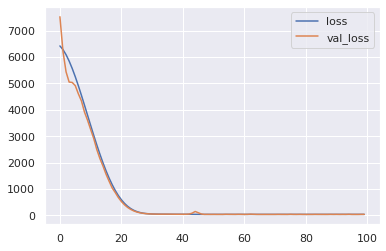

In [ ]:
#dense 64,64 mejoro el modelo...se agrego 2 layers mas
model = keras.Sequential([
    #layers.Normalization(),
    layers.Dense(4, activation='relu', input_dim=4),
    layers.BatchNormalization(),
    #layers.Dropout(0.3),    
    #layers.Dense(3, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    #layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    #layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    #layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=[keras.metrics.MeanSquaredError()]
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    monitor='val_loss'
)

history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    batch_size=20,
    epochs=100,
    verbose=0,
)

# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [ ]:
history_df.tail()

NameError: ignored

In [ ]:
eval_train = model.evaluate(X_train, Y_train)

85/85 [==============================] - 0s 3ms/step - loss: 36.7352 - mean_squared_error: 36.7352


In [ ]:
eval_test = model.evaluate(X_test, Y_test)

15/15 [==============================] - 0s 3ms/step - loss: 37.3920 - mean_squared_error: 37.3920


In [ ]:
from sklearn.metrics import r2_score
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
print("R2 score on train test: \t{}".format(r2_score(Y_train,y_train_pred)))
print("R2 score on test test: \t{}".format(r2_score(Y_test,y_test_pred)))

R2 score on train test: 	0.19210188925277305
R2 score on test test: 	0.19548554799555895


In [ ]:
#sns.scatterplot(x=lis,y=Y_test)

In [ ]:

y_test_pred

80.52896

In [ ]:
lis=[]
for i in range(len(y_test_pred)):
  lis.append(y_test_pred[i][0])
#lis

In [ ]:
#Y_test

In [ ]:
#lis